<a href="https://colab.research.google.com/github/Puneethv1357/EDP-0-to-ML/blob/main/NLP_Preprocess_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:

splits = {'train': 'split/train-00000-of-00001.parquet', 'validation': 'split/validation-00000-of-00001.parquet', 'test': 'split/test-00000-of-00001.parquet'}

train_df = pd.read_parquet("hf://datasets/dair-ai/emotion/" + splits["train"])
val_df = pd.read_parquet("hf://datasets/dair-ai/emotion/" + splits["validation"])
test_df = pd.read_parquet("hf://datasets/dair-ai/emotion/" + splits["test"])

print("Train DataFrame:")
display(train_df.head())
print("\nValidation DataFrame:")
display(val_df.head())
print("\nTest DataFrame:")
display(test_df.head())

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Train DataFrame:


,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3



Validation DataFrame:


,text,label
0,im feeling quite sad and sorry for myself but ...,0
1,i feel like i am still looking at a blank canv...,0
2,i feel like a faithful servant,2
3,i am just feeling cranky and blue,3
4,i can have for a treat or if i am feeling festive,1



Test DataFrame:


,text,label
0,im feeling rather rotten so im not very ambiti...,0
1,im updating my blog because i feel shitty,0
2,i never make her separate from me because i do...,0
3,i left with my bouquet of red and yellow tulip...,1
4,i was feeling a little vain when i did this one,0


In [3]:
emotion_labels = ['sadness', 'joy', 'love', 'anger', 'fear','surprise']

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2000 non-null   object
 1   label   2000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [6]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2000 non-null   object
 1   label   2000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [7]:
import spacy
nlp = spacy.load("en_core_web_sm")

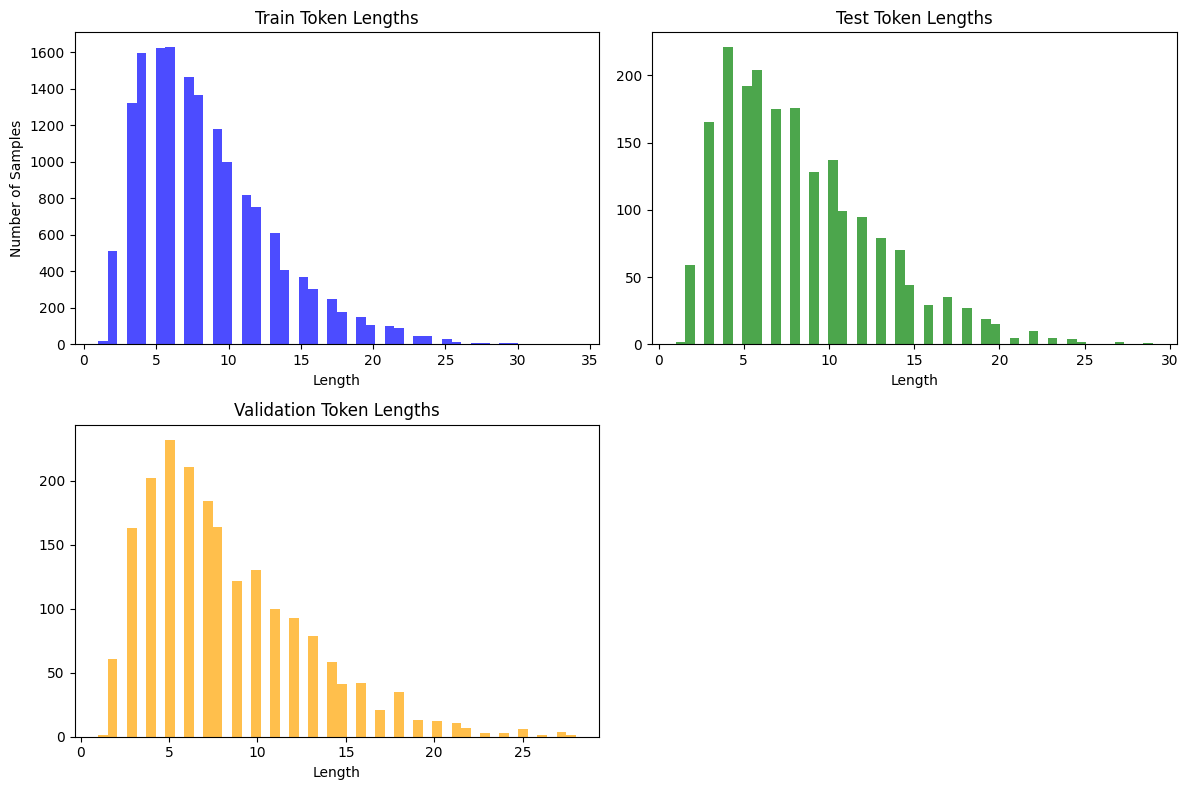

In [8]:
# Compute lengths
lengths_train = [len([token for token in nlp(text) if not token.is_stop and not token.is_punct and token.is_alpha])
                 for text in train_df['text']]
lengths_test = [len([token for token in nlp(text) if not token.is_stop and not token.is_punct and token.is_alpha])
                for text in test_df['text']]
lengths_val = [len([token for token in nlp(text) if not token.is_stop and not token.is_punct and token.is_alpha])
               for text in val_df['text']]

# Plot histograms
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(lengths_train, bins=50, color='blue', alpha=0.7)
plt.title('Train Token Lengths')
plt.xlabel('Length')
plt.ylabel('Number of Samples')

plt.subplot(2, 2, 2)
plt.hist(lengths_test, bins=50, color='green', alpha=0.7)
plt.title('Test Token Lengths')
plt.xlabel('Length')

plt.subplot(2, 2, 3)
plt.hist(lengths_val, bins=50, color='orange', alpha=0.7)
plt.title('Validation Token Lengths')
plt.xlabel('Length')

plt.tight_layout()
plt.show()


In [9]:
# Use the small model for fastest vectorization (token indexing)
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

def preprocess_and_pad(texts, batch_size=1000, n_process=-1, pad_length=20):
    sequences = []
    for doc in nlp.pipe(texts, batch_size=batch_size, n_process=n_process):
        # Lemmatize, remove stopwords/punctuation, and get vocab IDs
        token_ids = [
            token.rank for token in doc
            if not token.is_stop and not token.is_punct and token.is_alpha
        ]
        # Pad or truncate to fixed length
        if len(token_ids) < pad_length:
            token_ids += [0] * (pad_length - len(token_ids))  # pad with zeros
        else:
            token_ids = token_ids[:pad_length]  # truncate
        # Convert to comma-separated string
        sequences.append(",".join(map(str, token_ids)))
    return sequences

In [10]:
train_df['token_ids'] = list(preprocess_and_pad(train_df['text'].tolist(), pad_length=20))

display(train_df.head())

,text,label,token_ids
0,i didnt feel humiliated,0,"18446744073709551615,18446744073709551615,1844..."
1,i can go from feeling so hopeless to so damned...,0,"18446744073709551615,18446744073709551615,1844..."
2,im grabbing a minute to post i feel greedy wrong,3,"18446744073709551615,18446744073709551615,1844..."
3,i am ever feeling nostalgic about the fireplac...,2,"18446744073709551615,18446744073709551615,1844..."
4,i am feeling grouchy,3,"18446744073709551615,18446744073709551615,0,0,..."


In [11]:
test_df['token_ids'] = list(preprocess_and_pad(test_df['text'].tolist(), pad_length=20))

display(test_df.head())

,text,label,token_ids
0,im feeling rather rotten so im not very ambiti...,0,"18446744073709551615,18446744073709551615,1844..."
1,im updating my blog because i feel shitty,0,"18446744073709551615,18446744073709551615,1844..."
2,i never make her separate from me because i do...,0,"18446744073709551615,18446744073709551615,1844..."
3,i left with my bouquet of red and yellow tulip...,1,"18446744073709551615,18446744073709551615,1844..."
4,i was feeling a little vain when i did this one,0,"18446744073709551615,18446744073709551615,1844..."


In [12]:
val_df['token_ids'] = list(preprocess_and_pad(val_df['text'].tolist(), pad_length=20))

display(val_df.head())

,text,label,token_ids
0,im feeling quite sad and sorry for myself but ...,0,"18446744073709551615,18446744073709551615,1844..."
1,i feel like i am still looking at a blank canv...,0,"18446744073709551615,18446744073709551615,1844..."
2,i feel like a faithful servant,2,"18446744073709551615,18446744073709551615,1844..."
3,i am just feeling cranky and blue,3,"18446744073709551615,18446744073709551615,1844..."
4,i can have for a treat or if i am feeling festive,1,"18446744073709551615,18446744073709551615,1844..."


/tmp/ipython-input-13-2150200419.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(emotion_labels)


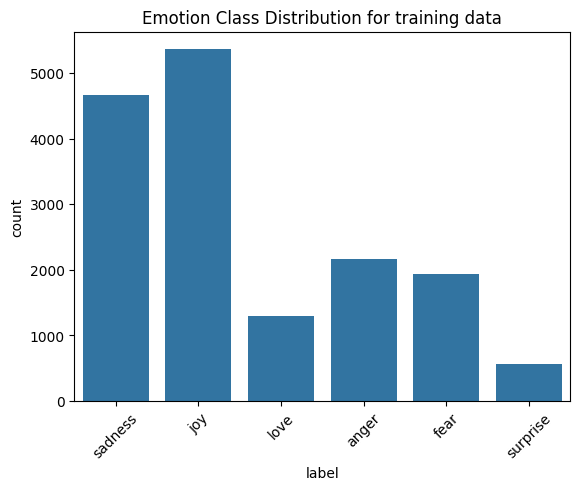

In [13]:



ax = sns.countplot(x='label', data=train_df)
plt.title("Emotion Class Distribution for training data")

# Set x-axis tick labels using the emotion_labels list
ax.set_xticklabels(emotion_labels)

plt.xticks(rotation=45)
plt.show()

In [14]:
# Save train_df to CSV
train_df.to_csv('train_data.csv', index=False)

# Save test_df to CSV
test_df.to_csv('test_data.csv', index=False)

# Save val_df to CSV
val_df.to_csv('val_data.csv', index=False)

print("DataFrames saved as CSV files: train_data.csv, test_data.csv, val_data.csv")

DataFrames saved as CSV files: train_data.csv, test_data.csv, val_data.csv
